# CONSUMERS CLASSIFICATION EXERCISE

Develop a Supervised Machine Learning model to classify the users of a Electricity Retail Company, according to their hourly electricity consumption profile during a day. This classification will allow the company's marketing staff to send personalized and appropriate offers to these two types of customer profiles: users with a **high consumption profile** and users with a **non-high consumption profile**.

The columns are (0) CUPs, (1) cluster and (2-26) hourly consumption (from h-0 to h-23).

# 1. Import libraries

In [4]:
import pandas as pd #import pandas
import matplotlib.pyplot as plt # import matplotlib to make graphs
import seaborn as sns # import seaborn to make graphics
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 2. Load dataset

<div class="alert alert-success">
    <b>Load the dataset </b>
</div>


In [15]:
## your code here
consumption = pd.read_excel('Data/S6_data-consumo-usuarios.xlsx')
consumption

CUPs  cluster       h-0       h-1       h-2       h-3       h-4  \
0    100001        0  1.388250  1.277500  1.333000  1.182000  1.169750   
1    100002        0  1.326000  1.217500  1.368750  1.139250  1.177750   
2    100003        0  1.212000  1.297500  1.102750  1.088250  1.124500   
3    100004        0  1.089250  1.081250  1.118250  1.059750  1.126750   
4    100005        0  0.908000  0.880750  1.039750  0.827500  1.023000   
..      ...      ...       ...       ...       ...       ...       ...   
439  100440        0  1.009320  1.216890  0.939820  0.968880  0.957480   
440  100441        0  0.985830  0.865925  0.969675  0.890820  0.804240   
441  100442        0  1.011767  0.990370  0.951462  1.005145  0.796455   
442  100443        0  1.195920  1.268753  1.243890  1.214200  1.237005   
443  100444        0  1.006583  1.200925  1.139400  1.121250  1.118453   

          h-5       h-6       h-7  ...      h-14      h-15      h-16  \
0    1.455500  1.346500  1.675000  ...  3.514750  3.475000  2.995250   
1    1.437750  1.337750  1.343000  ...  2.690000  2.778500  2.705250   
2    1.166500  1.115250  1.301500  ...  2.467250  2.256000  2.602000   
3    1.087750  1.125250  1.091000  ...  2.219000  2.256250  2.185750   
4    0.987000  1.072750  1.195750  ...  2.762000  2.902750  2.709000   
..        ...       ...       ...  ...       ...       ...       ...   
439  1.130190  1.066565  1.209075  ...  3.034515  2.513040  2.227500   
440  1.063217  0.949590  1.223500  ...  2.268588  2.145440  2.077400   
441  1.067000  1.063700  1.792700  ...  5.787630  2.291685  2.621995   
442  1.149633  1.091250  1.311660  ...  2.273435  2.466905  2.627500   
443  1.113788  1.102140  1.206660  ...  1.859387  2.190375  2.072015   

         h-17     h-18      h-19      h-20      h-21      h-22      h-23  
0    5.054750  3.07300  2.922250  2.719250  2.812000  1.993750  1.303500  
1    3.051750  2.99225  2.611750  2.597750  2.663250  1.264500  1.227500  
2    2.389250  2.56550  2.715500  6.058750  2.661000  2.260250  1.155500  
3    2.605750  2.54750  2.444750  2.488250  2.730000  1.183250  1.197000  
4    2.769000  2.78775  2.672000  3.276500  2.761500  3.366000  2.147000  
..        ...      ...       ...       ...       ...       ...       ...  
439  5.404725  2.81556  2.255500  1.982500  1.427750  1.219562  1.163500  
440  2.005065  1.87848  2.311500  2.382890  2.270785  1.469880  1.038065  
441  2.355160  2.57175  2.632025  2.668168  2.595285  2.473840  2.034390  
442  2.464605  2.73339  2.595720  2.497993  2.398672  1.371375  1.029735  
443  2.132235  2.27017  2.124960  2.315040  2.432063  1.841840  1.826213  

[444 rows x 26 columns]

<div class="alert alert-success">
    <b> Look for cluster uniques classes </b>
</div>

In [22]:
## your code here
consumption_0 = consumption[consumption['cluster']==0]
consumption_1 = consumption[consumption['cluster']==1]

In [24]:
consumption_0

CUPs  cluster       h-0       h-1       h-2       h-3       h-4  \
0    100001        0  1.388250  1.277500  1.333000  1.182000  1.169750   
1    100002        0  1.326000  1.217500  1.368750  1.139250  1.177750   
2    100003        0  1.212000  1.297500  1.102750  1.088250  1.124500   
3    100004        0  1.089250  1.081250  1.118250  1.059750  1.126750   
4    100005        0  0.908000  0.880750  1.039750  0.827500  1.023000   
..      ...      ...       ...       ...       ...       ...       ...   
439  100440        0  1.009320  1.216890  0.939820  0.968880  0.957480   
440  100441        0  0.985830  0.865925  0.969675  0.890820  0.804240   
441  100442        0  1.011767  0.990370  0.951462  1.005145  0.796455   
442  100443        0  1.195920  1.268753  1.243890  1.214200  1.237005   
443  100444        0  1.006583  1.200925  1.139400  1.121250  1.118453   

          h-5       h-6       h-7  ...      h-14      h-15      h-16  \
0    1.455500  1.346500  1.675000  ...  3.514750  3.475000  2.995250   
1    1.437750  1.337750  1.343000  ...  2.690000  2.778500  2.705250   
2    1.166500  1.115250  1.301500  ...  2.467250  2.256000  2.602000   
3    1.087750  1.125250  1.091000  ...  2.219000  2.256250  2.185750   
4    0.987000  1.072750  1.195750  ...  2.762000  2.902750  2.709000   
..        ...       ...       ...  ...       ...       ...       ...   
439  1.130190  1.066565  1.209075  ...  3.034515  2.513040  2.227500   
440  1.063217  0.949590  1.223500  ...  2.268588  2.145440  2.077400   
441  1.067000  1.063700  1.792700  ...  5.787630  2.291685  2.621995   
442  1.149633  1.091250  1.311660  ...  2.273435  2.466905  2.627500   
443  1.113788  1.102140  1.206660  ...  1.859387  2.190375  2.072015   

         h-17     h-18      h-19      h-20      h-21      h-22      h-23  
0    5.054750  3.07300  2.922250  2.719250  2.812000  1.993750  1.303500  
1    3.051750  2.99225  2.611750  2.597750  2.663250  1.264500  1.227500  
2    2.389250  2.56550  2.715500  6.058750  2.661000  2.260250  1.155500  
3    2.605750  2.54750  2.444750  2.488250  2.730000  1.183250  1.197000  
4    2.769000  2.78775  2.672000  3.276500  2.761500  3.366000  2.147000  
..        ...      ...       ...       ...       ...       ...       ...  
439  5.404725  2.81556  2.255500  1.982500  1.427750  1.219562  1.163500  
440  2.005065  1.87848  2.311500  2.382890  2.270785  1.469880  1.038065  
441  2.355160  2.57175  2.632025  2.668168  2.595285  2.473840  2.034390  
442  2.464605  2.73339  2.595720  2.497993  2.398672  1.371375  1.029735  
443  2.132235  2.27017  2.124960  2.315040  2.432063  1.841840  1.826213  

[289 rows x 26 columns]

In [26]:
consumption_1

CUPs  cluster       h-0       h-1       h-2       h-3       h-4  \
46   100047        1  1.907500  0.999750  0.803250  0.906500  0.789000   
52   100053        1  0.957750  0.905250  0.855750  0.979250  0.946250   
59   100060        1  1.241000  1.897500  1.099000  0.974750  1.872250   
60   100061        1  0.867750  1.003500  1.886250  0.933500  1.760000   
65   100066        1  2.908500  3.017750  0.981250  1.138500  1.190500   
..      ...      ...       ...       ...       ...       ...       ...   
359  100360        1  1.032888  1.832490  1.036282  2.006962  1.115000   
360  100361        1  2.447500  2.686850  0.984437  1.066000  0.984497   
364  100365        1  1.334288  1.681475  2.003308  1.627450  0.754537   
365  100366        1  2.181530  1.497420  2.519850  1.751063  0.869835   
404  100405        1  1.051133  1.225612  1.112515  1.006500  1.203215   

          h-5       h-6       h-7  ...      h-14      h-15      h-16  \
46   0.919000  1.094000  0.898500  ...  3.485500  5.161750  8.119750   
52   0.957000  1.100250  1.056000  ...  3.930000  4.450750  4.580250   
59   1.182500  1.155000  1.062500  ...  4.007750  3.542250  3.549500   
60   1.053250  1.089750  1.368500  ...  4.037750  4.216750  3.537500   
65   0.981250  1.021000  1.100500  ...  4.930500  3.216750  4.297250   
..        ...       ...       ...  ...       ...       ...       ...   
359  1.131375  1.756075  0.898937  ...  3.936310  3.507525  3.160655   
360  1.170660  1.062750  1.052887  ...  3.572295  3.586080  2.659982   
364  1.712000  0.870818  1.002820  ...  6.706755  4.455025  4.248750   
365  0.959790  1.873530  1.724800  ...  6.174702  5.393905  4.704440   
404  1.360250  1.358385  3.233100  ...  2.809373  2.684000  2.997270   

         h-17      h-18      h-19      h-20      h-21      h-22      h-23  
46   4.546500  4.853750  4.273500  4.182750  3.984000  4.225500  2.802000  
52   4.202750  3.860750  3.594250  2.927250  3.914250  4.592750  1.561250  
59   4.173500  4.013000  3.195750  2.773500  5.224500  2.851250  1.217750  
60   3.621000  3.932750  3.972750  5.007250  5.642750  2.475000  0.959750  
65   3.495000  3.546750  3.480000  3.308000  4.007250  2.798500  0.958750  
..        ...       ...       ...       ...       ...       ...       ...  
359  4.742745  3.709478  3.204720  3.268845  2.884560  2.928420  2.513970  
360  4.574325  3.981470  3.295920  3.566750  4.262750  2.444610  1.186110  
364  4.781285  3.758190  4.376790  4.385500  4.017048  2.716287  2.487483  
365  4.306253  4.836178  5.852525  5.484847  3.463020  2.659010  2.036260  
404  3.117690  2.862370  2.860500  3.021150  2.804490  1.791750  1.115240  

[155 rows x 26 columns]

In [18]:
# Dataset shape
consumption.shape

(444, 26)

In [20]:
consumption.describe()

CUPs     cluster         h-0         h-1         h-2  \
count     444.000000  444.000000  444.000000  444.000000  444.000000   
mean   100222.500000    0.349099    1.403755    1.430030    1.477743   
std       128.316016    0.477223    0.562010    0.603804    0.635645   
min    100001.000000    0.000000    0.697672    0.443040    0.531000   
25%    100111.750000    0.000000    0.993113    0.997351    1.019643   
50%    100222.500000    0.000000    1.223750    1.190750    1.213000   
75%    100333.250000    1.000000    1.693312    1.739111    1.873687   
max    100444.000000    1.000000    3.726500    3.918250    4.571100   

              h-3         h-4         h-5         h-6         h-7  ...  \
count  444.000000  444.000000  444.000000  444.000000  444.000000  ...   
mean     1.260568    1.219357    1.225835    1.260649    1.344087  ...   
std      0.458574    0.477387    0.383749    0.415624    0.447992  ...   
min      0.342000    0.382500    0.378280    0.434362    0.326750  ...   
25%      0.961681    0.930694    0.975312    1.004563    1.058625  ...   
50%      1.096000    1.087569    1.126444    1.138670    1.247723  ...   
75%      1.492284    1.354250    1.326500    1.375690    1.518699  ...   
max      4.152750    4.324500    3.079250    3.420360    3.569280  ...   

             h-14        h-15        h-16        h-17        h-18        h-19  \
count  444.000000  444.000000  444.000000  444.000000  444.000000  444.000000   
mean     3.058790    2.967447    3.173214    3.301687    3.296296    3.331575   
std      1.162409    1.217470    1.242378    1.320278    1.261710    1.281144   
min      0.949750    0.620000    1.073250    1.007000    0.866750    0.903750   
25%      2.255812    2.173579    2.331441    2.371188    2.367928    2.443750   
50%      2.716190    2.547500    2.802671    2.844000    3.048860    2.924250   
75%      3.677875    3.515246    3.764123    4.045924    3.983977    4.053402   
max      7.271453    6.914142    8.119750    9.490780    7.885350    8.186570   

             h-20        h-21        h-22        h-23  
count  444.000000  444.000000  444.000000  444.000000  
mean     3.227387    3.129273    2.469491    1.798851  
std      1.284128    1.204418    1.054665    0.893173  
min      1.070175    1.031250    0.804750    0.667500  
25%      2.380937    2.309605    1.773783    1.146362  
50%      2.825398    2.803950    2.186750    1.532600  
75%      3.836875    3.782884    2.984568    2.221375  
max      8.416835    7.424175    7.410118    7.126920  

[8 rows x 26 columns]

<div class="alert alert-success">
    <b> Are there missing value? </b>
</div>

In [28]:
## your code here
consumption.isna().sum()

CUPs       0
cluster    0
h-0        0
h-1        0
h-2        0
h-3        0
h-4        0
h-5        0
h-6        0
h-7        0
h-8        0
h-9        0
h-10       0
h-11       0
h-12       0
h-13       0
h-14       0
h-15       0
h-16       0
h-17       0
h-18       0
h-19       0
h-20       0
h-21       0
h-22       0
h-23       0
dtype: int64

#### Let's see how many cases we have in each of the clusters. Do we have a balanced dataset?

In [30]:
# cluster==0
print("Number cluster 0:", consumption[consumption['cluster'] == 0]['cluster'].count())
# cluster=1
print("Number cluster 1:", consumption[consumption['cluster'] == 1]['cluster'].count())

Number cluster 0: 289
Number cluster 1: 155


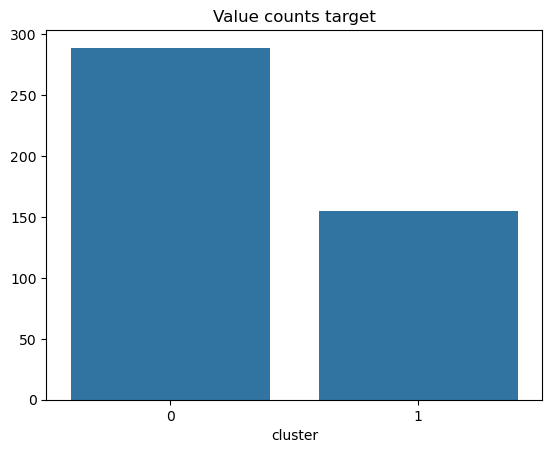

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the value counts
x = consumption['cluster'].value_counts()

# Create the barplot
sns.barplot(x=x.index, y=x.values)

# Set the title
plt.title('Value counts target')

# Show the plot
plt.show()

<div class="alert alert-success">
    <b> Create two dataframes (one for each cluster) to analyze them separately </b>
</div>

In [34]:
consumption_0.drop(['CUPs','cluster'], axis=1).mean(axis=1)

0      2.531875
1      2.170562
2      2.078875
3      1.867479
4      2.077635
         ...   
439    1.978791
440    1.739556
441    2.097049
442    1.921914
443    1.913525
Length: 289, dtype: float64

In [36]:
# Average hourly consumption comparison
print("Average hourly power cluster 0: ", consumption_0.drop(['CUPs','cluster'], axis=1).mean(axis=1).mean(), 'kW')
print("Average hourly power cluster 1: ", consumption_1.drop(['CUPs','cluster'], axis=1).mean(axis=1).mean(), 'kW')




Average hourly power cluster 0:  2.02564708405421 kW
Average hourly power cluster 1:  2.8965269784946237 kW


**Remove the 'cluster' column in order to plot the different load curves.**

In [40]:
df_0 = consumption_0.drop(['cluster'], axis=1)
df_0

CUPs       h-0       h-1       h-2       h-3       h-4       h-5  \
0    100001  1.388250  1.277500  1.333000  1.182000  1.169750  1.455500   
1    100002  1.326000  1.217500  1.368750  1.139250  1.177750  1.437750   
2    100003  1.212000  1.297500  1.102750  1.088250  1.124500  1.166500   
3    100004  1.089250  1.081250  1.118250  1.059750  1.126750  1.087750   
4    100005  0.908000  0.880750  1.039750  0.827500  1.023000  0.987000   
..      ...       ...       ...       ...       ...       ...       ...   
439  100440  1.009320  1.216890  0.939820  0.968880  0.957480  1.130190   
440  100441  0.985830  0.865925  0.969675  0.890820  0.804240  1.063217   
441  100442  1.011767  0.990370  0.951462  1.005145  0.796455  1.067000   
442  100443  1.195920  1.268753  1.243890  1.214200  1.237005  1.149633   
443  100444  1.006583  1.200925  1.139400  1.121250  1.118453  1.113788   

          h-6       h-7       h-8  ...      h-14      h-15      h-16  \
0    1.346500  1.675000  3.335250  ...  3.514750  3.475000  2.995250   
1    1.337750  1.343000  2.517500  ...  2.690000  2.778500  2.705250   
2    1.115250  1.301500  1.685250  ...  2.467250  2.256000  2.602000   
3    1.125250  1.091000  1.536000  ...  2.219000  2.256250  2.185750   
4    1.072750  1.195750  1.496500  ...  2.762000  2.902750  2.709000   
..        ...       ...       ...  ...       ...       ...       ...   
439  1.066565  1.209075  1.923545  ...  3.034515  2.513040  2.227500   
440  0.949590  1.223500  1.216350  ...  2.268588  2.145440  2.077400   
441  1.063700  1.792700  1.705637  ...  5.787630  2.291685  2.621995   
442  1.091250  1.311660  2.053750  ...  2.273435  2.466905  2.627500   
443  1.102140  1.206660  2.197440  ...  1.859387  2.190375  2.072015   

         h-17     h-18      h-19      h-20      h-21      h-22      h-23  
0    5.054750  3.07300  2.922250  2.719250  2.812000  1.993750  1.303500  
1    3.051750  2.99225  2.611750  2.597750  2.663250  1.264500  1.227500  
2    2.389250  2.56550  2.715500  6.058750  2.661000  2.260250  1.155500  
3    2.605750  2.54750  2.444750  2.488250  2.730000  1.183250  1.197000  
4    2.769000  2.78775  2.672000  3.276500  2.761500  3.366000  2.147000  
..        ...      ...       ...       ...       ...       ...       ...  
439  5.404725  2.81556  2.255500  1.982500  1.427750  1.219562  1.163500  
440  2.005065  1.87848  2.311500  2.382890  2.270785  1.469880  1.038065  
441  2.355160  2.57175  2.632025  2.668168  2.595285  2.473840  2.034390  
442  2.464605  2.73339  2.595720  2.497993  2.398672  1.371375  1.029735  
443  2.132235  2.27017  2.124960  2.315040  2.432063  1.841840  1.826213  

[289 rows x 25 columns]

**Make the "column CUPs" as index (it makes sense, since each row has a different value and identifies the SM).**

In [42]:
df_0.set_index(['CUPs'], inplace=True)

# Transpose the matrix, for ease of plotting
df_0 = df_0.T

# We change the name of the index to "hour".
df_0.index.name = 'hour'
df_0.head()

CUPs   100001   100002   100003   100004   100005   100006   100007   100008  \
hour                                                                           
h-0   1.38825  1.32600  1.21200  1.08925  0.90800  0.97575  1.03625  1.16575   
h-1   1.27750  1.21750  1.29750  1.08125  0.88075  0.85600  1.20600  1.27625   
h-2   1.33300  1.36875  1.10275  1.11825  1.03975  1.09300  1.11125  1.13000   
h-3   1.18200  1.13925  1.08825  1.05975  0.82750  0.95575  1.09850  1.08175   
h-4   1.16975  1.17775  1.12450  1.12675  1.02300  0.91150  1.14975  1.16900   

CUPs   100009   100010  ...    100435    100436    100437    100438    100439  \
hour                    ...                                                     
h-0   1.12325  1.24525  ...  1.279390  1.290828  1.330875  1.446500  1.154785   
h-1   1.15675  1.09950  ...  1.128838  1.511675  1.321585  1.398127  1.151540   
h-2   1.17025  1.00475  ...  1.160425  1.396285  1.334557  1.360593  1.220670   
h-3   1.03875  1.08900  ...  1.067570  1.424233  1.447050  1.400750  1.168405   
h-4   1.11600  1.12725  ...  1.040725  1.265875  1.424250  1.497925  0.949050   

CUPs   100440    100441    100442    100443    100444  
hour                                                   
h-0   1.00932  0.985830  1.011767  1.195920  1.006583  
h-1   1.21689  0.865925  0.990370  1.268753  1.200925  
h-2   0.93982  0.969675  0.951462  1.243890  1.139400  
h-3   0.96888  0.890820  1.005145  1.214200  1.121250  
h-4   0.95748  0.804240  0.796455  1.237005  1.118453  

[5 rows x 289 columns]

In [44]:
df_1 = consumption_1.drop(['cluster'], axis=1)
df_1.set_index(['CUPs'], inplace=True)
df_1 = df_1.T
df_1.index.name = 'hour'
df_1.head()

CUPs   100047   100053   100060   100061   100066   100067   100086   100105  \
hour                                                                           
h-0   1.90750  0.95775  1.24100  0.86775  2.90850  1.91825  0.87100  1.39900   
h-1   0.99975  0.90525  1.89750  1.00350  3.01775  2.10550  1.52025  1.64550   
h-2   0.80325  0.85575  1.09900  1.88625  0.98125  0.98225  2.01375  1.79825   
h-3   0.90650  0.97925  0.97475  0.93350  1.13850  1.81900  1.06250  2.03925   
h-4   0.78900  0.94625  1.87225  1.76000  1.19050  1.07875  0.90775  0.74700   

CUPs   100106   100110  ...    100355    100356    100357    100358    100359  \
hour                    ...                                                     
h-0   1.45575  1.70300  ...  0.939360  1.732560  1.548960  0.927850  1.228805   
h-1   0.81725  0.85850  ...  1.827965  1.775020  1.614690  0.932850  1.788000   
h-2   1.86550  1.81900  ...  0.909685  1.715245  2.021125  1.367932  0.897487   
h-3   1.85725  1.02600  ...  1.802682  0.856535  1.735440  0.828960  0.906593   
h-4   0.91025  1.08325  ...  0.881140  0.897637  1.855170  0.922465  0.984543   

CUPs    100360    100361    100365    100366    100405  
hour                                                    
h-0   1.032888  2.447500  1.334288  2.181530  1.051133  
h-1   1.832490  2.686850  1.681475  1.497420  1.225612  
h-2   1.036282  0.984437  2.003308  2.519850  1.112515  
h-3   2.006962  1.066000  1.627450  1.751063  1.006500  
h-4   1.115000  0.984497  0.754537  0.869835  1.203215  

[5 rows x 155 columns]

**We obtain a list with the columns of the two dfs to have the CUPs of cluster 0 and cluster 1.**

In [46]:
cups_0 = df_0.columns
cups_1 = df_1.columns

print(cups_0)

Index([100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008, 100009,
       100010,
       ...
       100435, 100436, 100437, 100438, 100439, 100440, 100441, 100442, 100443,
       100444],
      dtype='int64', name='CUPs', length=289)


**Create a plot**

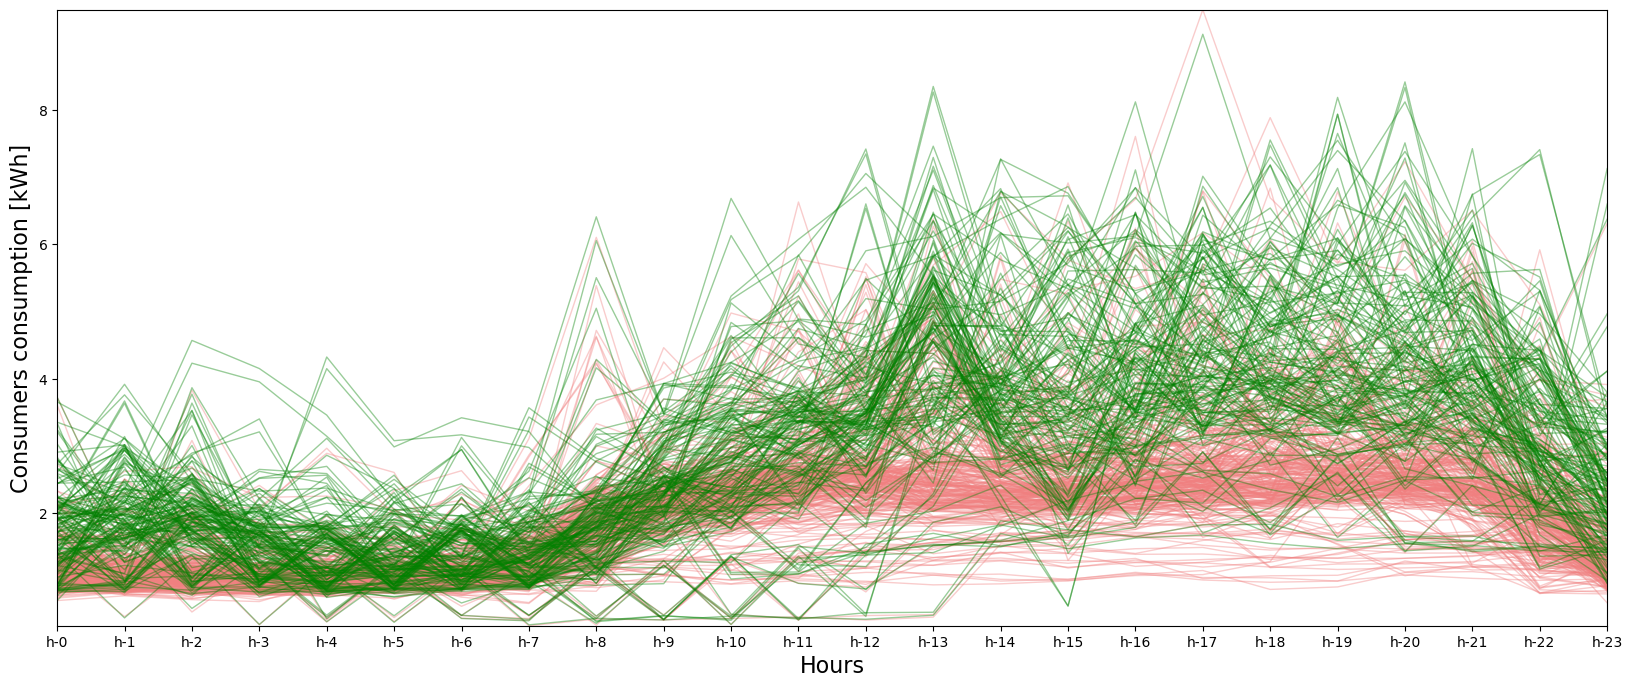

In [49]:

plt.figure(figsize=(20,8))

# Create a loop where cups takes each of the strings in the cups_0 list.
for cups in cups_0:
    # 'lightcoral' indicates the color (https://matplotlib.org/2.1.1/gallery/color/named_colors.html)
    # linewidth sets the line width and alpha the transparency
    plt.plot(df_0[cups], 'lightcoral', linewidth=1, alpha=0.4)
for cups in cups_1:
    plt.plot(df_1[cups], 'green', linewidth=1, alpha=0.4)

    # X axis displays the hours
plt.xticks(df_0.index)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Consumers consumption [kWh]', fontsize=16)

plt.margins(x=0, y=0)
plt.show()  

<div class="alert alert-success">
    <b> Add average consumption to distinguish more clearly the differences between the clusters. </b>
</div>

In [63]:
df_0['mean'] = df_0.mean(axis =1, numeric_only = True)
df_1['mean'] = df_1.mean(axis =1, numeric_only = True)
df_0

CUPs   100001   100002   100003   100004   100005   100006   100007   100008  \
hour                                                                           
h-0   1.38825  1.32600  1.21200  1.08925  0.90800  0.97575  1.03625  1.16575   
h-1   1.27750  1.21750  1.29750  1.08125  0.88075  0.85600  1.20600  1.27625   
h-2   1.33300  1.36875  1.10275  1.11825  1.03975  1.09300  1.11125  1.13000   
h-3   1.18200  1.13925  1.08825  1.05975  0.82750  0.95575  1.09850  1.08175   
h-4   1.16975  1.17775  1.12450  1.12675  1.02300  0.91150  1.14975  1.16900   
h-5   1.45550  1.43775  1.16650  1.08775  0.98700  0.87900  1.43450  1.37175   
h-6   1.34650  1.33775  1.11525  1.12525  1.07275  1.10900  1.19000  1.16550   
h-7   1.67500  1.34300  1.30150  1.09100  1.19575  1.29250  1.35925  1.45900   
h-8   3.33525  2.51750  1.68525  1.53600  1.49650  1.93250  1.34625  1.76400   
h-9   2.98525  2.68600  2.06150  2.18075  2.45325  2.20900  2.48675  2.10975   
h-10  3.05400  2.79925  2.11475  2.99400  2.22975  2.17350  2.40600  2.18375   
h-11  3.75400  3.19300  2.15200  2.57250  2.37075  2.58450  2.53750  2.23200   
h-12  3.42350  3.24925  2.64250  2.69425  2.48425  2.57375  5.51875  2.61375   
h-13  3.52200  2.71825  2.69775  2.20525  2.74075  2.65800  2.32025  2.24675   
h-14  3.51475  2.69000  2.46725  2.21900  2.76200  2.62250  2.18850  2.23025   
h-15  3.47500  2.77850  2.25600  2.25625  2.90275  2.70425  2.29550  2.28175   
h-16  2.99525  2.70525  2.60200  2.18575  2.70900  2.63825  2.33950  2.36225   
h-17  5.05475  3.05175  2.38925  2.60575  2.76900  2.37100  2.29475  2.39875   
h-18  3.07300  2.99225  2.56550  2.54750  2.78775  2.38450  2.57100  2.45250   
h-19  2.92225  2.61175  2.71550  2.44475  2.67200  2.12225  2.55350  2.62525   
h-20  2.71925  2.59775  6.05875  2.48825  3.27650  2.35925  2.67250  2.87950   
h-21  2.81200  2.66325  2.66100  2.73000  2.76150  2.35475  2.45675  2.41875   
h-22  1.99375  1.26450  2.26025  1.18325  3.36600  2.36350  2.14650  1.94850   
h-23  1.30350  1.22750  1.15550  1.19700  2.14700  1.40950  2.13725  1.40525   

CUPs   100009   100010  ...    100436    100437    100438    100439    100440  \
hour                    ...                                                     
h-0   1.12325  1.24525  ...  1.290828  1.330875  1.446500  1.154785  1.009320   
h-1   1.15675  1.09950  ...  1.511675  1.321585  1.398127  1.151540  1.216890   
h-2   1.17025  1.00475  ...  1.396285  1.334557  1.360593  1.220670  0.939820   
h-3   1.03875  1.08900  ...  1.424233  1.447050  1.400750  1.168405  0.968880   
h-4   1.11600  1.12725  ...  1.265875  1.424250  1.497925  0.949050  0.957480   
h-5   1.15150  1.17700  ...  1.637210  1.359775  1.441798  1.156250  1.130190   
h-6   1.32775  1.33775  ...  1.481270  1.381845  1.383547  1.215540  1.066565   
h-7   1.30075  1.14550  ...  1.632800  1.504745  1.621920  1.640533  1.209075   
h-8   1.64450  1.80200  ...  1.887840  1.654640  1.702500  2.280553  1.923545   
h-9   2.42750  2.43350  ...  2.218650  1.919950  2.004998  2.362895  2.312270   
h-10  2.74450  2.23175  ...  1.972740  2.120000  1.836275  2.070600  2.271750   
h-11  4.39900  2.83125  ...  2.238517  2.277318  2.235350  2.299162  2.474505   
h-12  5.02675  2.89725  ...  2.265190  2.550345  2.588040  2.244275  2.715300   
h-13  2.72500  2.84800  ...  2.245425  2.030400  2.265742  2.179480  3.251250   
h-14  2.56100  2.83600  ...  2.332200  2.291180  2.295562  2.183858  3.034515   
h-15  2.39675  2.84300  ...  2.254120  1.961040  2.496463  2.432100  2.513040   
h-16  2.21325  2.80050  ...  2.398140  2.043790  2.281662  2.227575  2.227500   
h-17  2.16725  2.82825  ...  2.089920  2.331510  2.515320  2.200028  5.404725   
h-18  2.11700  2.89375  ...  2.179995  2.222505  2.362575  2.052610  2.815560   
h-19  2.34875  2.81125  ...  2.042737  2.982525  2.376270  2.374292  2.255500   
h-20  2.56725  2.85800  ...  2.093525  4.540750  2.244445  2.170875  1.982500   
h-21  2.26675  3.14575  ...  2.220487  2.622540  2.22386

**We create the same graphs as before, adding the average curves of the two clusters with more opacity (alpha)**

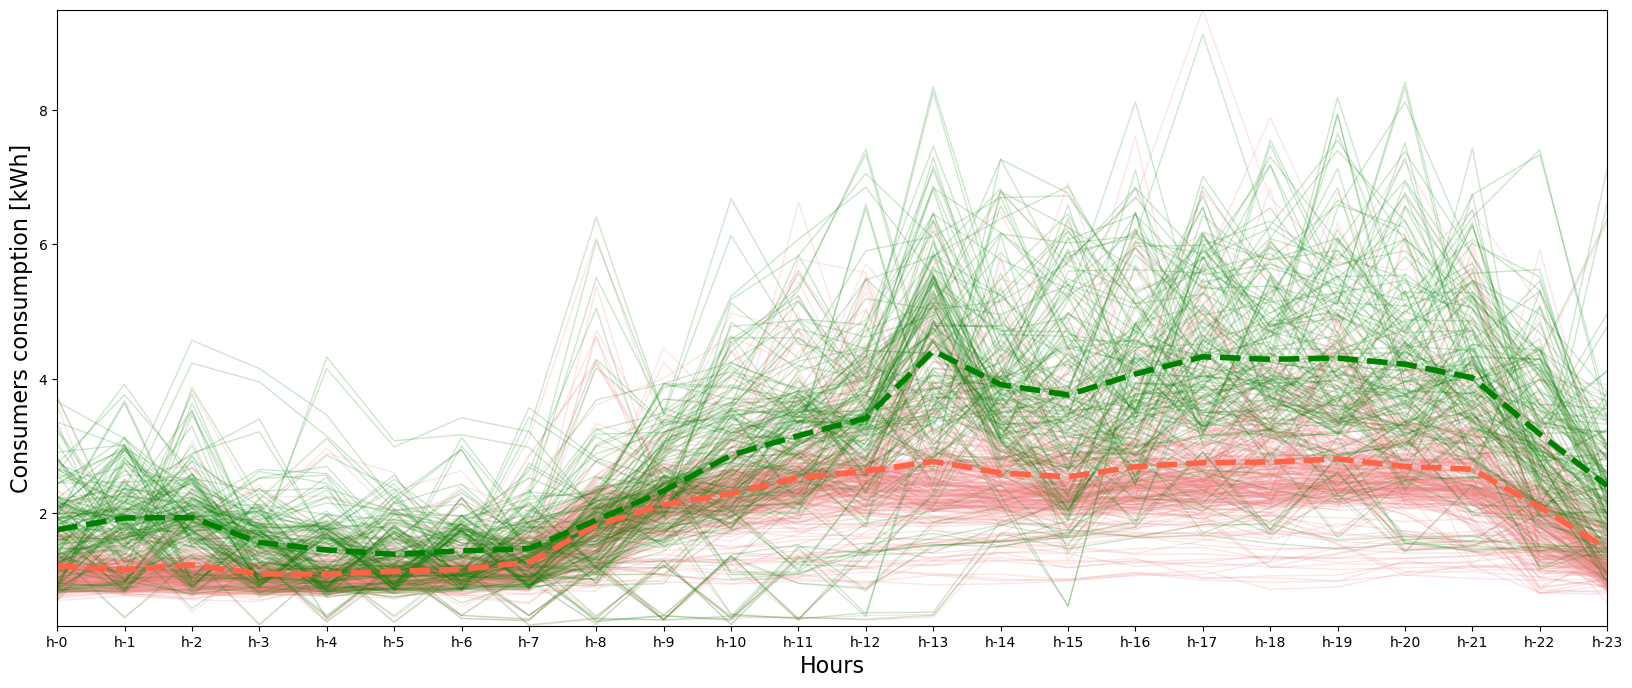

In [65]:

plt.figure(figsize=(20,8))
for cups in cups_0:
    plt.plot(df_0[cups], 'lightcoral', linewidth=1, alpha=0.2)

for cups in cups_1:
    plt.plot(df_1[cups], 'green', linewidth=1, alpha=0.2)

plt.plot(df_0['mean'], 'tomato', linestyle='dashed', linewidth=4, alpha=1)    
plt.plot(df_1['mean'], 'green', linestyle='dashed', linewidth=4, alpha=1)

plt.xticks(df_0.index)
plt.margins(x=0, y=0)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Consumers consumption [kWh]', fontsize=16)
plt.show()  

**Correlation between features and target**

<Axes: >

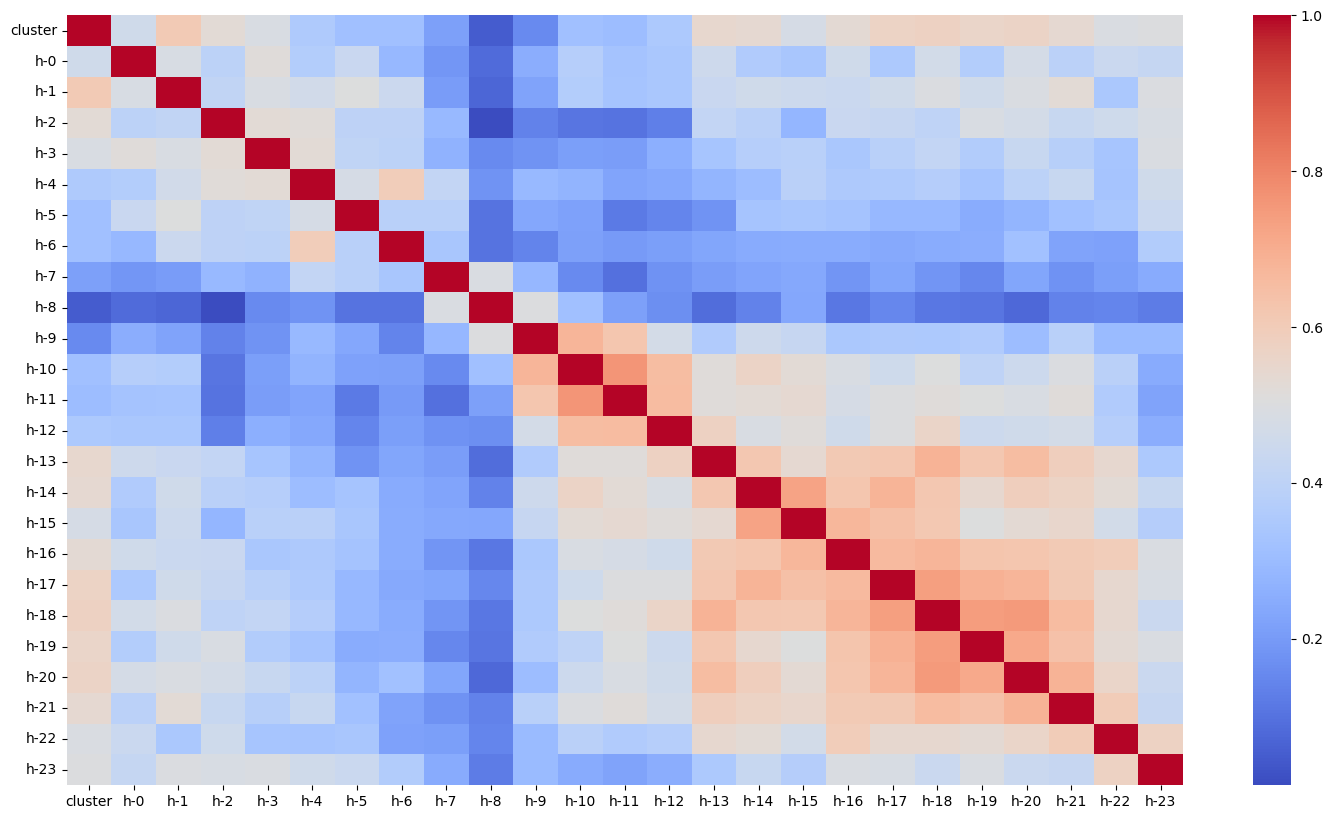

In [67]:

plt.figure(figsize=(18, 10))

# Create the correlation matrix after eliminating the CUPs column since it does not provide information in this case.
corr = consumption.drop(['CUPs'],axis=1).corr()

# Create a heat map to visually detect the correlation between the columns.
sns.heatmap(corr, cmap="coolwarm")

**Let's now create some Boxplots to detect the variability within each cluster.**

Clients_0: 'non-high consumption'

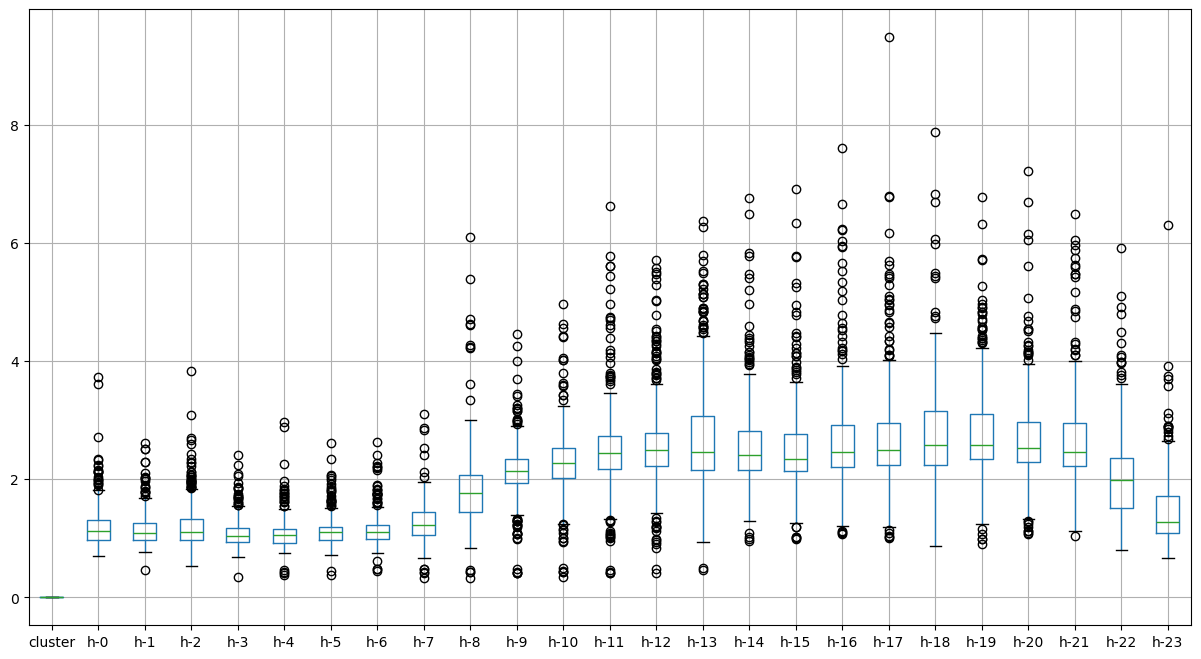

In [69]:
# Creating boxplot
plt.subplots(figsize=(15, 8))
bp = consumption_0.drop(['CUPs'],axis=1).boxplot(column=list(consumption_0.drop(['CUPs'],axis=1).columns))
plt.show()

Clients_1: 'high consumption'

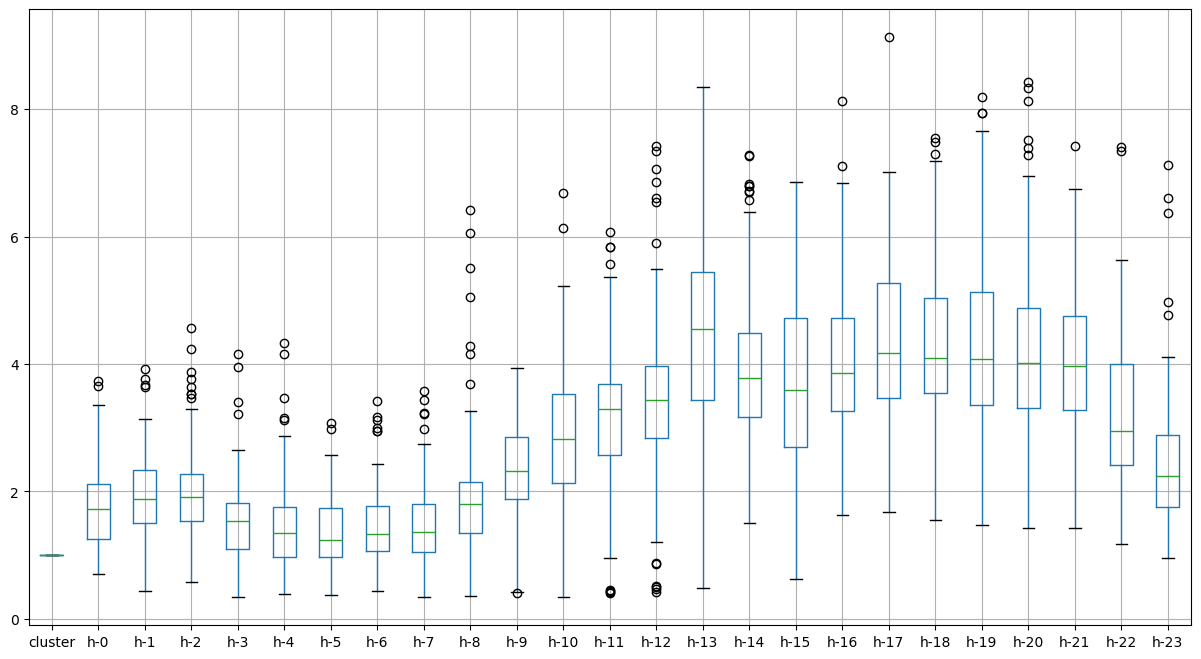

In [71]:
plt.subplots(figsize=(15, 8))
bp = consumption_1.drop(['CUPs'],axis=1).boxplot(column=list(consumption_1.drop(['CUPs'],axis=1).columns))
plt.show()

### Feature engineering
Create some new features that may be interesting to reduce the dimensionality of the problem and improve the performance of the algorithm. New features starting from the hourly consumption (mean, max, std, mean(13h-21h)).

<div class="alert alert-success">
    <b> Create some new features that may be interesting to reduce the dimensionality of the problem and improve the performance of the algorithm. "max" and "min" </b>
</div>

In [81]:

hours = list(consumption.drop(['CUPs', 'cluster'], axis=1))

# Basic examples (please note that some of these characteristics may have a high correlation between them)
consumption['average'] = consumption[hours].mean(axis=1)
consumption['max'] = consumption[hours].max(axis=1)
consumption['min'] = consumption[hours].min(axis=1)
consumption['std'] = consumption[hours].std(axis=1)

# Example minmax
minmax = []
# iteramos fila a fila en nuestro df
for index, row in consumption.iterrows():
    # si el mínimo es 0, fijaremos minmax a 0, para evitar una indeterminación 0/0
    if row['min'] == 0:
        minmax.append(0)
    else:
        minmax.append(row['min']/row['max'])
consumption['minmax'] = minmax
consumption

CUPs  cluster       h-0       h-1       h-2       h-3       h-4  \
0    100001        0  1.388250  1.277500  1.333000  1.182000  1.169750   
1    100002        0  1.326000  1.217500  1.368750  1.139250  1.177750   
2    100003        0  1.212000  1.297500  1.102750  1.088250  1.124500   
3    100004        0  1.089250  1.081250  1.118250  1.059750  1.126750   
4    100005        0  0.908000  0.880750  1.039750  0.827500  1.023000   
..      ...      ...       ...       ...       ...       ...       ...   
439  100440        0  1.009320  1.216890  0.939820  0.968880  0.957480   
440  100441        0  0.985830  0.865925  0.969675  0.890820  0.804240   
441  100442        0  1.011767  0.990370  0.951462  1.005145  0.796455   
442  100443        0  1.195920  1.268753  1.243890  1.214200  1.237005   
443  100444        0  1.006583  1.200925  1.139400  1.121250  1.118453   

          h-5       h-6       h-7  ...      h-19      h-20      h-21  \
0    1.455500  1.346500  1.675000  ...  2.922250  2.719250  2.812000   
1    1.437750  1.337750  1.343000  ...  2.611750  2.597750  2.663250   
2    1.166500  1.115250  1.301500  ...  2.715500  6.058750  2.661000   
3    1.087750  1.125250  1.091000  ...  2.444750  2.488250  2.730000   
4    0.987000  1.072750  1.195750  ...  2.672000  3.276500  2.761500   
..        ...       ...       ...  ...       ...       ...       ...   
439  1.130190  1.066565  1.209075  ...  2.255500  1.982500  1.427750   
440  1.063217  0.949590  1.223500  ...  2.311500  2.382890  2.270785   
441  1.067000  1.063700  1.792700  ...  2.632025  2.668168  2.595285   
442  1.149633  1.091250  1.311660  ...  2.595720  2.497993  2.398672   
443  1.113788  1.102140  1.206660  ...  2.124960  2.315040  2.432063   

         h-22      h-23   average       max       min       std    minmax  
0    1.993750  1.303500  2.441489  5.054750  0.231416  1.270149  0.045782  
1    1.264500  1.227500  2.061141  3.249250  0.350619  0.914502  0.107908  
2    2.260250  1.155500  2.080454  6.058750  0.179616  1.333785  0.029646  
3    1.183250  1.197000  1.785530  2.994000  0.353958  0.806053  0.118222  
4    3.366000  2.147000  1.973317  3.366000  0.245841  0.974671  0.073036  
..        ...       ...       ...       ...       ...       ...       ...  
439  1.219562  1.163500  1.965776  5.404725  0.173889  1.254455  0.032173  
440  1.469880  1.038065  1.700598  4.067335  0.197731  0.942239  0.048614  
441  2.473840  2.034390  2.074591  5.787630  0.137613  1.297594  0.023777  
442  1.371375  1.029735  1.821101  2.733390  0.376725  0.756254  0.137823  
443  1.841840  1.826213  1.869800  4.417770  0.227849  0.965900  0.051575  

[444 rows x 31 columns]

In [83]:
# Example average over a period of time. We have seen that between 13h and 21h there is a greater difference between clusters. 
peak_hours = ['h-' + str(x) for x in range(13,21)]
consumption['peak_hours'] = consumption[peak_hours].mean(axis=1)

consumption.head(10)

CUPs  cluster      h-0      h-1      h-2      h-3      h-4      h-5  \
0  100001        0  1.38825  1.27750  1.33300  1.18200  1.16975  1.45550   
1  100002        0  1.32600  1.21750  1.36875  1.13925  1.17775  1.43775   
2  100003        0  1.21200  1.29750  1.10275  1.08825  1.12450  1.16650   
3  100004        0  1.08925  1.08125  1.11825  1.05975  1.12675  1.08775   
4  100005        0  0.90800  0.88075  1.03975  0.82750  1.02300  0.98700   
5  100006        0  0.97575  0.85600  1.09300  0.95575  0.91150  0.87900   
6  100007        0  1.03625  1.20600  1.11125  1.09850  1.14975  1.43450   
7  100008        0  1.16575  1.27625  1.13000  1.08175  1.16900  1.37175   
8  100009        0  1.12325  1.15675  1.17025  1.03875  1.11600  1.15150   
9  100010        0  1.24525  1.09950  1.00475  1.08900  1.12725  1.17700   

       h-6      h-7  ...     h-20     h-21     h-22     h-23   average  \
0  1.34650  1.67500  ...  2.71925  2.81200  1.99375  1.30350  2.441489   
1  1.33775  1.34300  ...  2.59775  2.66325  1.26450  1.22750  2.061141   
2  1.11525  1.30150  ...  6.05875  2.66100  2.26025  1.15550  2.080454   
3  1.12525  1.09100  ...  2.48825  2.73000  1.18325  1.19700  1.785530   
4  1.07275  1.19575  ...  3.27650  2.76150  3.36600  2.14700  1.973317   
5  1.10900  1.29250  ...  2.35925  2.35475  2.36350  1.40950  1.792847   
6  1.19000  1.35925  ...  2.67250  2.45675  2.14650  2.13725  2.055123   
7  1.16550  1.45900  ...  2.87950  2.41875  1.94850  1.40525  1.820288   
8  1.32775  1.30075  ...  2.56725  2.26675  2.34900  1.73175  2.084274   
9  1.33775  1.14550  ...  2.85800  3.14575  3.06750  1.95350  2.060171   

       max       min       std    minmax  peak_hours  
0  5.05475  0.231416  1.270149  0.045782    3.409531  
1  3.24925  0.350619  0.914502  0.107908    2.768188  
2  6.05875  0.179616  1.333785  0.029646    2.969000  
3  2.99400  0.353958  0.806053  0.118222    2.369063  
4  3.36600  0.245841  0.974671  0.073036    2.827469  
5  2.70425  0.316539  0.800147  0.117052    2.482500  
6  5.51875  0.187769  1.204597  0.034024    2.404438  
7  2.87950  0.375673  0.724771  0.130465    2.434625  
8  5.02675  0.206644  1.190414  0.041109    2.387031  
9  3.14575  0.319399  0.927582  0.101534    2.839844  

[10 rows x 32 columns]

**Check the correlation matrix again**

<Axes: >

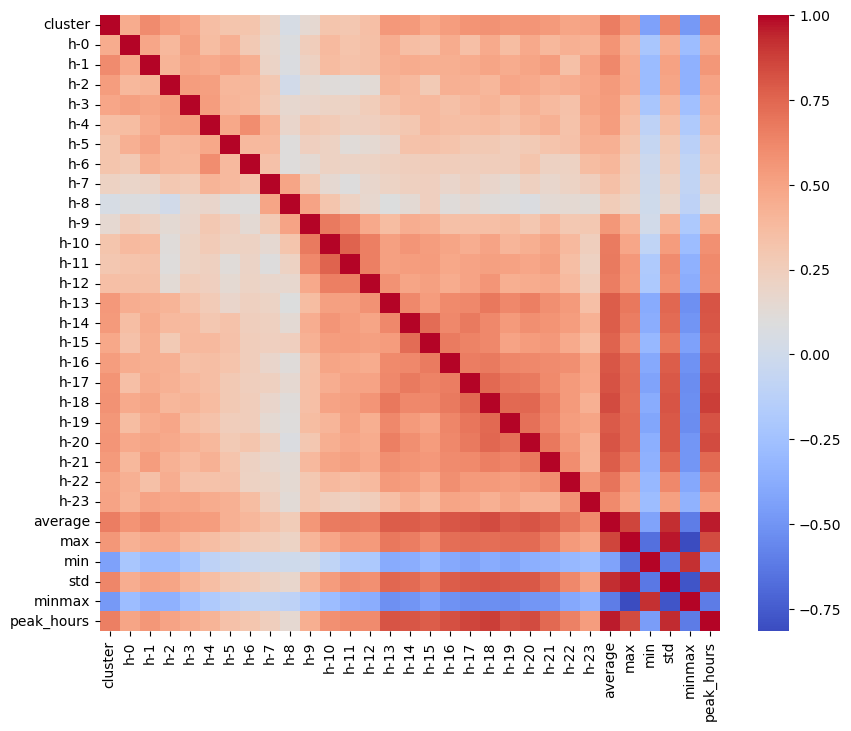

In [85]:
f, ax = plt.subplots(figsize=(10, 8))
corr = consumption.drop(['CUPs'],axis=1).corr()
sns.heatmap(corr, cmap="coolwarm")

# Negative correlation (close to -1) is also interesting, as may be the case for minmax and cluster.

## Split the data

The seed ***randome_state=0*** is used for all exercises. ***Suffle=True*** indicates that the data is randomly split between training and test. This reduces the variance and prevents the model from overfitting.

In [87]:
X = consumption.drop(['cluster'], axis=1) 
y = consumption['cluster']

In [89]:
X.drop(columns=["CUPs"], inplace=True)

In [91]:
X

h-0       h-1       h-2       h-3       h-4       h-5       h-6  \
0    1.388250  1.277500  1.333000  1.182000  1.169750  1.455500  1.346500   
1    1.326000  1.217500  1.368750  1.139250  1.177750  1.437750  1.337750   
2    1.212000  1.297500  1.102750  1.088250  1.124500  1.166500  1.115250   
3    1.089250  1.081250  1.118250  1.059750  1.126750  1.087750  1.125250   
4    0.908000  0.880750  1.039750  0.827500  1.023000  0.987000  1.072750   
..        ...       ...       ...       ...       ...       ...       ...   
439  1.009320  1.216890  0.939820  0.968880  0.957480  1.130190  1.066565   
440  0.985830  0.865925  0.969675  0.890820  0.804240  1.063217  0.949590   
441  1.011767  0.990370  0.951462  1.005145  0.796455  1.067000  1.063700   
442  1.195920  1.268753  1.243890  1.214200  1.237005  1.149633  1.091250   
443  1.006583  1.200925  1.139400  1.121250  1.118453  1.113788  1.102140   

          h-7       h-8       h-9  ...      h-20      h-21      h-22  \
0    1.675000  3.335250  2.985250  ...  2.719250  2.812000  1.993750   
1    1.343000  2.517500  2.686000  ...  2.597750  2.663250  1.264500   
2    1.301500  1.685250  2.061500  ...  6.058750  2.661000  2.260250   
3    1.091000  1.536000  2.180750  ...  2.488250  2.730000  1.183250   
4    1.195750  1.496500  2.453250  ...  3.276500  2.761500  3.366000   
..        ...       ...       ...  ...       ...       ...       ...   
439  1.209075  1.923545  2.312270  ...  1.982500  1.427750  1.219562   
440  1.223500  1.216350  1.909025  ...  2.382890  2.270785  1.469880   
441  1.792700  1.705637  2.364120  ...  2.668168  2.595285  2.473840   
442  1.311660  2.053750  2.242000  ...  2.497993  2.398672  1.371375   
443  1.206660  2.197440  1.989890  ...  2.315040  2.432063  1.841840   

         h-23   average       max       min       std    minmax  peak_hours  
0    1.303500  2.441489  5.054750  0.231416  1.270149  0.045782    3.409531  
1    1.227500  2.061141  3.249250  0.350619  0.914502  0.107908    2.768188  
2    1.155500  2.080454  6.058750  0.179616  1.333785  0.029646    2.969000  
3    1.197000  1.785530  2.994000  0.353958  0.806053  0.118222    2.369063  
4    2.147000  1.973317  3.366000  0.245841  0.974671  0.073036    2.827469  
..        ...       ...       ...       ...       ...       ...         ...  
439  1.163500  1.965776  5.404725  0.173889  1.254455  0.032173    2.935574  
440  1.038065  1.700598  4.067335  0.197731  0.942239  0.048614    2.177295  
441  2.034390  2.074591  5.787630  0.137613  1.297594  0.023777    2.903848  
442  1.029735  1.821101  2.733390  0.376725  0.756254  0.137823    2.461371  
443  1.826213  1.869800  4.417770  0.227849  0.965900  0.051575    2.162155  

[444 rows x 30 columns]

In [93]:
from sklearn.model_selection import train_test_split

test_size = 0.3  # percentage of the input data that I will use to validate the model
random_state=0
# Divide the data into training, validation and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state,
                                                    shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state,
                                                    shuffle=True)

<div class="alert alert-success">
    <b> Add more Classification algorithms </b>
</div>

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

num_folds = 5
error_metrics = {'balanced_accuracy'}
models = {('LR', LogisticRegression()),
           ('RF', RandomForestClassifier())}

results = [] # stores the results of the evaluation metrics
names = [] # name of each algorithm
msg = [] # print the summary of the cross-validation method


Classification evaluation metric:  balanced_accuracy
Model  RF
Model  LR
[('RF', 0.8785714285714284, 0.04811497709038385), ('LR', 0.8357142857142857, 0.023007319154866295)]


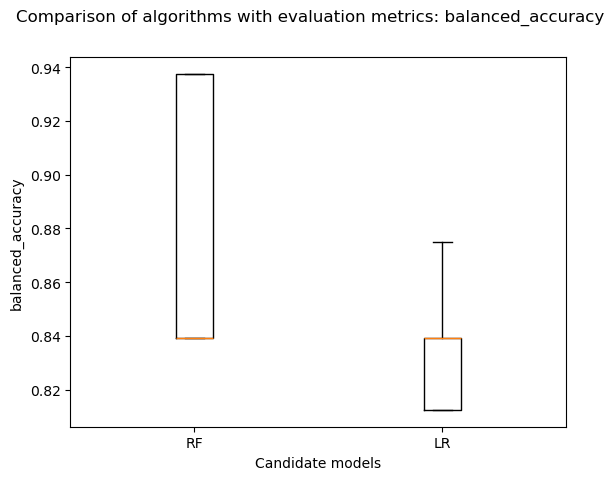

In [98]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# Entreno con validación cruzada
for scoring in error_metrics:
    print('Classification evaluation metric: ', scoring)
    for name, model in models:
        print('Model ', name)
        cross_validation = StratifiedShuffleSplit(n_splits=num_folds, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    fig = plt.figure()
    fig.suptitle('Comparison of algorithms with evaluation metrics: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []

## *Hyperparameter setting*.

All machine learning models have a set of hyperparameters or arguments that drive optimal accuracy and performance. The best hyperparameter is subjective and is different for every dataset and it is up to the practitioner to evaluate.

To find the best possible hyperparameters specifications for your dataset is through trial and error, the main concept behind hyperparameter optimization. Hyperparameter optimization involves searching through a range of organized or random values to find a subset of parameter results that deliver the best performance on your data. Two prominent techniques include Grid Search and Random Search. Here’s an overtly simplified graphic with both Grid and Random using the same number of combinations on a two dimensional plane:

<img src="Figures/hyperparameters.jpg" alt="Drawing" style="width: 700px;"/>


Steps to perform hyperadjustment of parameters:

* Metric to optimize: *balanced_accuracy*
* Define search parameter ranges: *params*
* Assign a validation method: *StratifiedShuffleSplit* (n_splits = 10).
* Train with the validation data: *X_val*

### Grid Search

When performing hyperparameter optimization, we first need to define a parameter space or parameter grid, where we include a set of possible hyperparameter values that can be used to build the model. Here we use the grid space for a Random Forest Classifier. Other algorithms would have different grid spaces.

The model is trained on every combination of hyperparameter values. Because there is a lot of different combinations of hyperparameters to test, Grid Search can take some time to complete and is generally slower than Random Search due to sheer volume. 

In [102]:

#RandomForestClassifier
model = RandomForestClassifier()

grid_space = {
     'n_estimators': [100, 500], #default=100
     'min_samples_split': [2,5] #default=2
 }


scoring='balanced_accuracy'
cross_validation = StratifiedShuffleSplit(n_splits=5, random_state=0)
my_cv = cross_validation.split(X_val, y_val)

gsearch = GridSearchCV(estimator=model, param_grid=grid_space, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

print("Best results: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Best results: 0.900000 using the following hyperparameters {'min_samples_split': 2, 'n_estimators': 100}


In [103]:
means

array([0.9  , 0.875, 0.9  , 0.875])

In [104]:
stds

array([0.05651942, 0.09501462, 0.05651942, 0.09501462])

In [105]:
params

[{'min_samples_split': 2, 'n_estimators': 100},
 {'min_samples_split': 2, 'n_estimators': 500},
 {'min_samples_split': 5, 'n_estimators': 100},
 {'min_samples_split': 5, 'n_estimators': 500}]

### Random Search

While grid search looks at every possible combination of hyperparameters to find the best model, random search only selects and tests a random combination of hyperparameters.

This technique randomly samples from a grid of hyperparameters instead of conducting an exhaustive search. We use the random integer function to randomly select a number within each parameter in the grid. 

Now we can specify the number of runs of random search. Lower numbers will be faster but may result in less-than-ideal scores. More runs will start to trend towards the full exhaustive grid search for better results. 

In [111]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


rs_space={'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }


In [113]:
scoring='balanced_accuracy'
cross_validation = StratifiedShuffleSplit(n_splits=5, random_state=0)
my_cv = cross_validation.split(X_val, y_val)


model_rs = RandomForestClassifier()
rf_random = RandomizedSearchCV(model_rs, rs_space, n_iter=100, scoring='balanced_accuracy', cv=my_cv)
model_random = rf_random.fit(X_val,y_val)



print("Best results: %f using the following hyperparameters %s" % (rf_random.best_score_, rf_random.best_params_))
means = rf_random.cv_results_['mean_test_score']
stds = rf_random.cv_results_['std_test_score']
params = rf_random.cv_results_['params']

Best results: 0.925000 using the following hyperparameters {'criterion': 'gini', 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 310}


## Final evaluation of the model.
Evaluation metrics:
  * 1. Confusion matrix
  * 2. Matthews Coefficient (MCC)
  * 3. ROC / AUC curve


In [114]:

clf_model = RandomForestClassifier(min_samples_split=2, criterion='gini', max_features=5, min_samples_leaf=3, n_estimators=360)
clf_model.fit(X_train,y_train)  # The RF model is trained
y_predict = clf_model.predict(X_test)  # Predictions are calculated


In [115]:
y_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

#### Print the hyperparameters configuration

In [119]:
clf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 360,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### **Print the feature ranking importance**

In [122]:
import numpy as np

# Get the feature importance from the best RF model
attribute_importance = gsearch.best_estimator_.feature_importances_
feature_names = X.columns.tolist()


# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': attribute_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



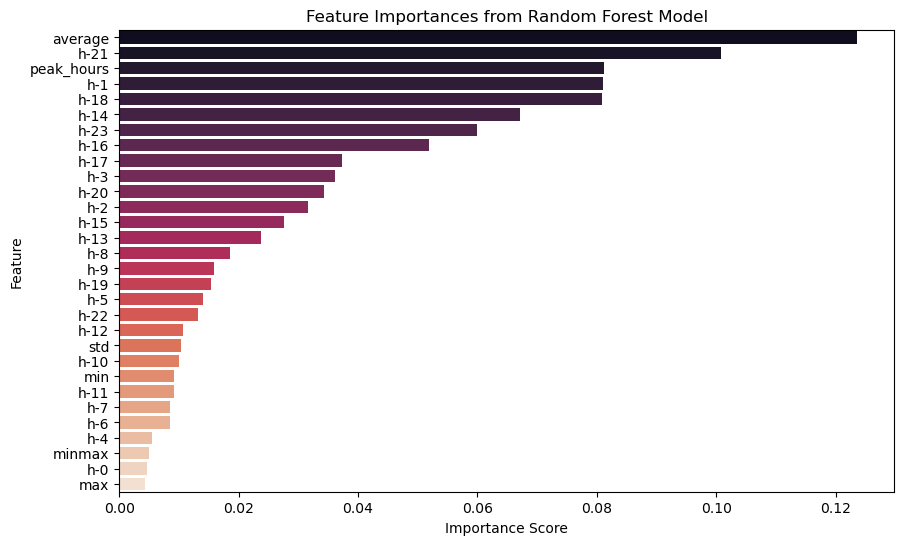

Most Relevant Features:
       Feature  Importance
24     average    0.123633
21        h-21    0.100849
29  peak_hours    0.081216
1          h-1    0.080983
18        h-18    0.080832
14        h-14    0.067190
23        h-23    0.059920
16        h-16    0.051954
17        h-17    0.037233
3          h-3    0.036089


In [124]:

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print the most relevant features
print("Most Relevant Features:")
print(feature_importance_df.head(10))  # Show top 10 features


**1. Confusion matrix**

In [127]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        90
           1       0.78      0.89      0.83        44

    accuracy                           0.88       134
   macro avg       0.86      0.88      0.87       134
weighted avg       0.89      0.88      0.88       134

[[79 11]
 [ 5 39]]


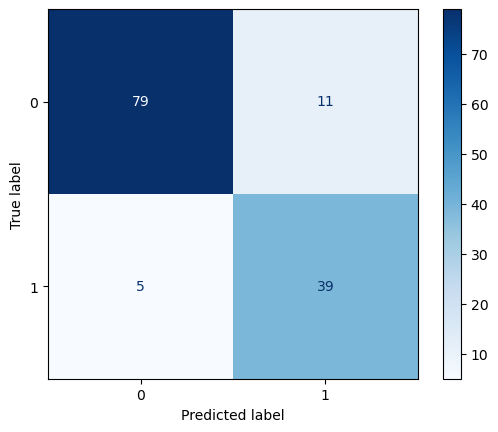

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay


# clf_model is your trained classifier, and X_test, y_test are the test data and labels
disp = ConfusionMatrixDisplay.from_estimator(
    clf_model, X_test, y_test,
    cmap=plt.cm.Blues
)
plt.show()

**2. Matthews Coefficient (MCC)**.

The MCC uses correlation coefficients between -1 and +1. 
* Coefficient +1 represents a perfect prediction.
* Coefficient 0 represents a random mean prediction.
* Coefficient -1 represents an inverse prediction. 

In [132]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_predict)

0.7419876650226034

**3. ROC curve / AUC**.

* ROC curve: Curve of the true positive rate versus false positive rate at different classification thresholds.

* AUC: (Area under the curve): The area under the curve (AUC) ROC is the probability that a classifier is more confident that a randomly chosen positive example is truly positive relative to a randomly chosen negative example being positive.

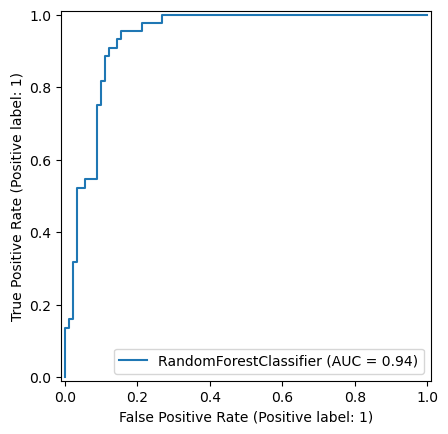

AUC: 0.935


In [135]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve


# Plot ROC curve using RocCurveDisplay
RocCurveDisplay.from_estimator(clf_model, X_test, y_test)
plt.show()

# Calculate AUC score
# Use predicted probabilities for the positive class
y_prob = clf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print('AUC: %.3f' % auc_score)

## Plot the End-users prediction results (y_test vs y_predict)

In [137]:
X_test

h-0       h-1       h-2       h-3       h-4       h-5       h-6  \
327  2.730787  3.761520  2.594287  1.250640  1.187450  2.164560  1.337750   
233  1.178500  1.182750  1.135750  1.017250  1.123750  1.060000  1.130750   
122  2.083000  2.286500  1.878000  1.540500  1.351750  2.239500  0.971250   
102  0.815500  0.843250  1.465250  0.828000  0.862250  1.006250  1.020750   
71   0.960750  0.880500  1.018000  0.983250  1.076000  1.042500  1.070500   
..        ...       ...       ...       ...       ...       ...       ...   
213  1.032500  0.905750  1.005000  0.813250  0.841500  0.870750  0.876500   
416  0.906565  0.814800  0.894860  1.225625  0.930525  1.119610  1.608840   
423  1.799740  1.493040  1.636700  1.388900  1.709800  1.490002  1.569470   
325  3.726500  1.639987  2.074420  2.084720  2.891378  2.607275  0.909585   
403  1.095350  1.050250  0.997750  0.995752  1.203400  0.911280  1.115748   

          h-7       h-8       h-9  ...      h-20      h-21      h-22  \
327  1.799040  1.780062  3.166112  ...  4.876820  4.859540  3.422887   
233  1.339000  1.856250  2.273250  ...  2.554500  2.315000  1.414250   
122  1.500750  1.746500  3.110000  ...  3.100000  3.460000  2.552750   
102  1.429250  1.860500  1.959000  ...  2.667250  2.752250  3.492250   
71   1.172500  1.679250  1.917000  ...  3.763000  2.183250  2.516000   
..        ...       ...       ...  ...       ...       ...       ...   
213  1.025250  1.326000  1.747500  ...  2.613000  2.824750  2.870750   
416  1.352430  1.714728  2.142003  ...  2.525450  2.258165  2.340260   
423  1.650087  1.785750  1.787822  ...  2.188890  1.890000  1.790775   
325  1.003290  2.254230  3.403350  ...  5.614825  6.503460  5.104320   
403  1.372388  2.472030  3.445763  ...  2.653587  3.028300  1.553755   

         h-23   average       max       min       std    minmax  peak_hours  
327  3.323375  3.550819  7.460775  0.159159  1.963795  0.021333    5.416638  
233  1.186250  1.799908  2.683000  0.379146  0.757144  0.141314    2.452813  
122  1.338500  2.555102  5.571250  0.174333  1.293211  0.031291    3.477188  
102  1.082500  1.997769  4.490250  0.181616  1.142114  0.040447    2.932813  
71   1.717750  1.890676  4.661250  0.188898  1.093803  0.040525    2.640250  
..        ...       ...       ...       ...       ...       ...         ...  
213  2.849500  1.781136  2.870750  0.283288  0.863194  0.098681    2.468906  
416  1.248360  1.690197  2.665050  0.305735  0.710220  0.114720    2.318797  
423  1.804425  1.706305  2.188890  0.195807  0.501140  0.089455    1.951365  
325  2.893510  3.746835  7.885350  0.115351  2.137096  0.014629    5.428593  
403  1.141447  2.021188  3.445763  0.264464  1.010887  0.076750    2.837122  

[134 rows x 30 columns]

As before, we need to transpose the Matrix so it is easier to plot the average hourly consumption

In [140]:

X_test_T = X_test.T


### Let's plot out model's end-user classification predictions (X_test -- y_predict)

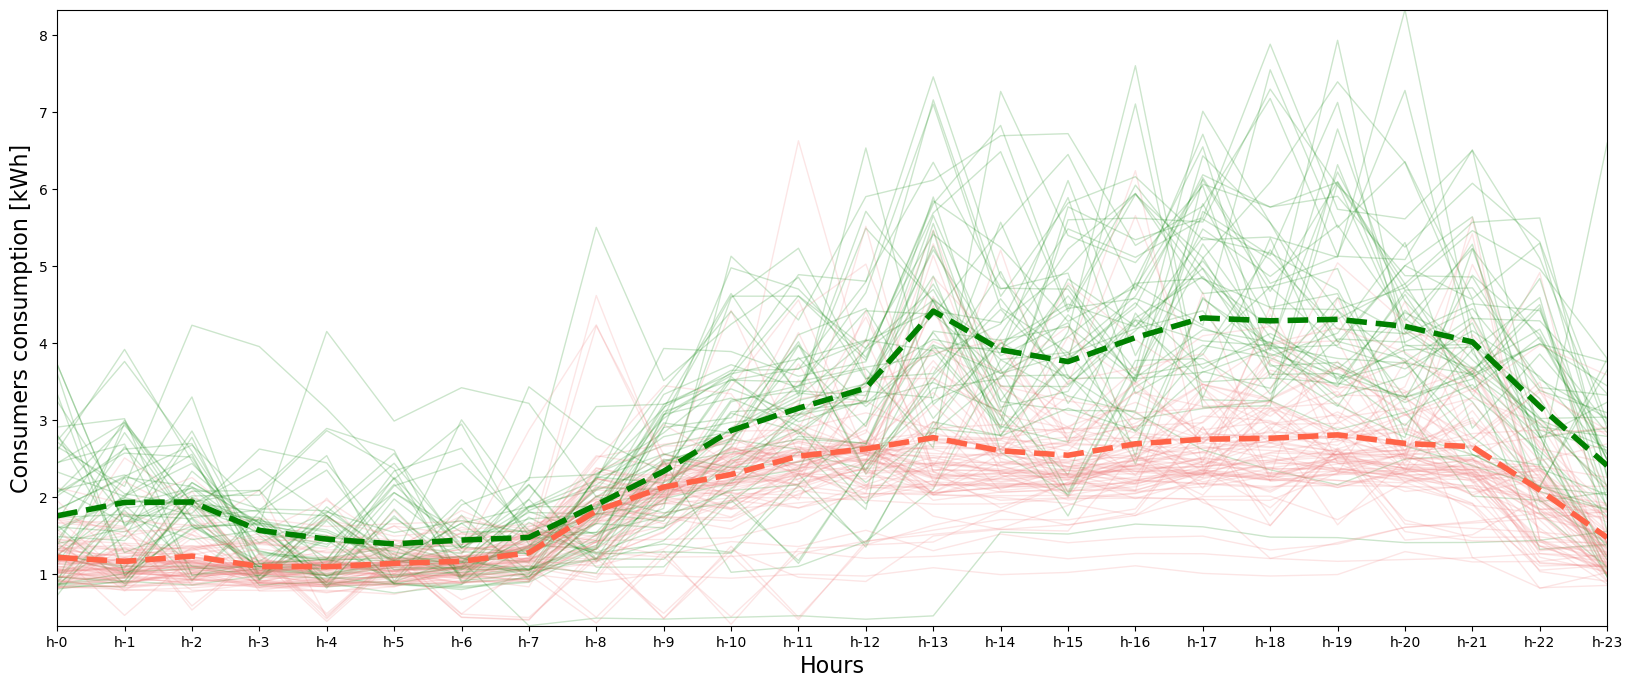

In [143]:
X_test_T_hours = X_test_T[:24]
cups = X_test_T.columns
i = 0

plt.figure(figsize=(20,8))
for cups_ in cups:
    if y_predict[i] == 0:
        color ='lightcoral'
    else:
        color = 'green'
    
    plt.plot(X_test_T_hours[cups_], color=color, linewidth=1, alpha=0.2)
    
    i = i + 1
    
    
plt.plot(df_0['mean'], 'tomato', linestyle='dashed', linewidth=4, alpha=1)    
plt.plot(df_1['mean'], 'green', linestyle='dashed', linewidth=4, alpha=1)

plt.xticks(df_0.index)
plt.margins(x=0, y=0)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Consumers consumption [kWh]', fontsize=16)
plt.show()  

### Let's plot the real end-users classification (X_test -- y_test)

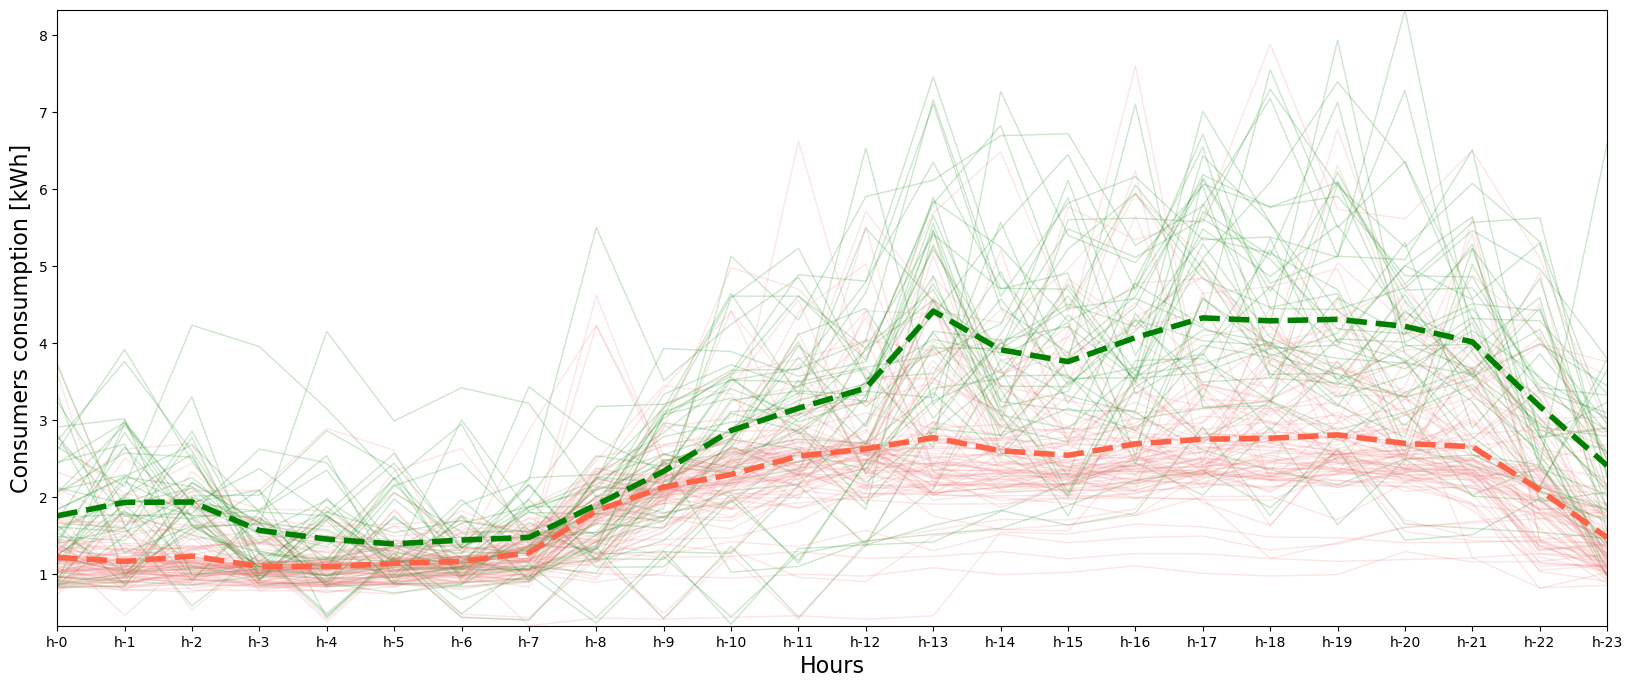

In [146]:

i = 0
y_test_np = y_test.to_numpy()

plt.figure(figsize=(20,8))
for cups_ in cups:
    if y_test_np[i] == 0:
        color ='lightcoral'
    else:
        color = 'green'
    
    plt.plot(X_test_T_hours[cups_], color=color, linewidth=1, alpha=0.2)
    
    i = i + 1
    
    
plt.plot(df_0['mean'], 'tomato', linestyle='dashed', linewidth=4, alpha=1)    
plt.plot(df_1['mean'], 'green', linestyle='dashed', linewidth=4, alpha=1)

plt.xticks(df_0.index)
plt.margins(x=0, y=0)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Consumers consumption [kWh]', fontsize=16)
plt.show()

### It is not straight forward to see the differences between True and Predicted curves. Therefore, let's plot only the end users that we could not classify correctly


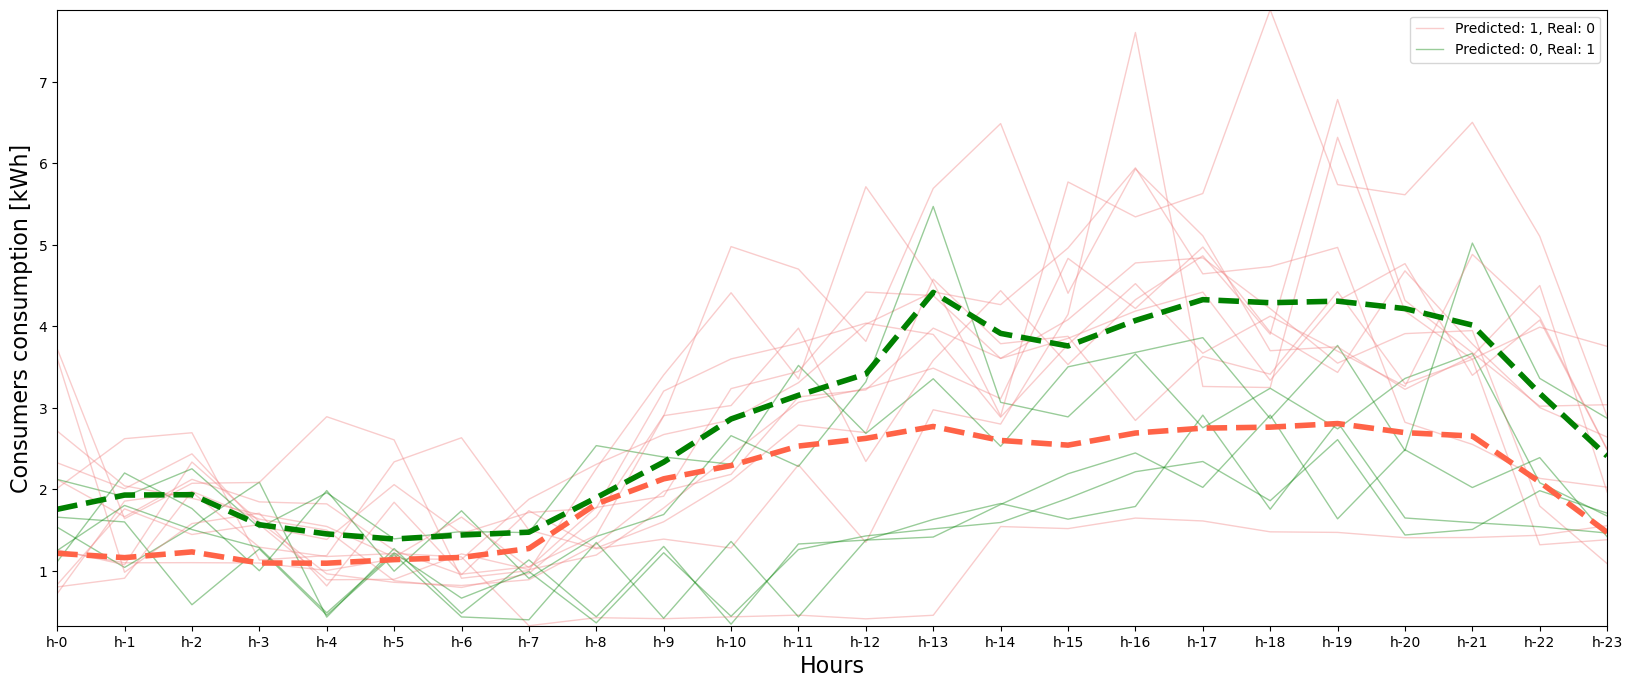

In [149]:

i = 0
y_test_np = y_test.to_numpy()

# Initialize flags to control label display
predicted_1_real_0_label_added = False
predicted_0_real_1_label_added = False
plt.figure(figsize=(20,8))
for cups_ in cups:
    
    if y_test_np[i] != y_predict[i]:
        
        # Condition for Predicted: 1, Real: 0
        if y_test_np[i] == 0:
            if not predicted_1_real_0_label_added:
                plt.plot(X_test_T_hours[cups_], color='lightcoral', linewidth=1, alpha=0.4, label="Predicted: 1, Real: 0")
                predicted_1_real_0_label_added = True
            else:
                plt.plot(X_test_T_hours[cups_], color='lightcoral', linewidth=1, alpha=0.4)
        
        # Condition for Predicted: 0, Real: 1
        else:
            if not predicted_0_real_1_label_added:
                plt.plot(X_test_T_hours[cups_], color='green', linewidth=1, alpha=0.4, label="Predicted: 0, Real: 1")
                predicted_0_real_1_label_added = True
            else:
                plt.plot(X_test_T_hours[cups_], color='green', linewidth=1, alpha=0.4)
    
    i += 1

# Additional plots
plt.plot(df_0['mean'], 'tomato', linestyle='dashed', linewidth=4, alpha=1)    
plt.plot(df_1['mean'], 'green', linestyle='dashed', linewidth=4, alpha=1)

# Formatting
plt.xticks(df_0.index)
plt.margins(x=0, y=0)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Consumers consumption [kWh]', fontsize=16)
plt.legend()
plt.show()